# <font color='blue'> Matrices de correlación locales </font>

El objetivo de este notebook es ejemplificar el cálculo, acomodo y graficación de matrices de correlación de forma local.

## <font color='crimson'> Importar los datos </font>

In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import numpy as np

**Datos disponibles en csv**:

In [6]:
dataLocation='./data'
!ls {dataLocation} | grep .csv

returns^MXX_from2008-09-15_to2022-05-17_downloaded20230517.csv
returns^MXX_from2008-09-15_to2022-06-16_downloaded20220616.csv
returns_SP500.csv
stockPrices_downloaded20230517.csv


In [7]:
dataName='stockPrices_downloaded20230517.csv'

data=pd.read_csv(
    f'{dataLocation}/{dataName}',
    index_col=0,
    parse_dates=True
)

data

,LABB.MX,GENTERA.MX,WMT.MX
2010-12-30,25.710072,18.476227,650.904663
2011-01-03,26.457203,18.545977,657.174255
2011-01-04,26.518732,18.427408,657.174255
2011-01-05,27.239491,17.939169,654.815674
2011-01-06,27.511972,17.688078,647.121521
...,...,...,...
2022-05-10,18.047804,14.037169,3033.468262
2022-05-11,17.664007,14.377904,2993.501709
2022-05-12,17.439342,13.774435,2983.010498
2022-05-13,17.982275,13.985171,2962.527344


En un `DataFrame` de Pandas ya es más fácil calcular, por ejemplo, los rendimientos (logarítmicos):

In [14]:
dataLogRets=np.log(data).diff(axis=0).iloc[1:]
dataLogRets

,LABB.MX,GENTERA.MX,WMT.MX
2011-01-03,0.028646,0.003768,0.009586
2011-01-04,0.002323,-0.006414,0.000000
2011-01-05,0.026816,-0.026853,-0.003595
2011-01-06,0.009953,-0.014096,-0.011820
2011-01-07,0.007955,-0.036952,0.000000
...,...,...,...
2022-05-10,-0.023072,-0.003339,-0.023439
2022-05-11,-0.021495,0.023984,-0.013263
2022-05-12,-0.012800,-0.042878,-0.003511
2022-05-13,0.030658,0.015183,-0.006890


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

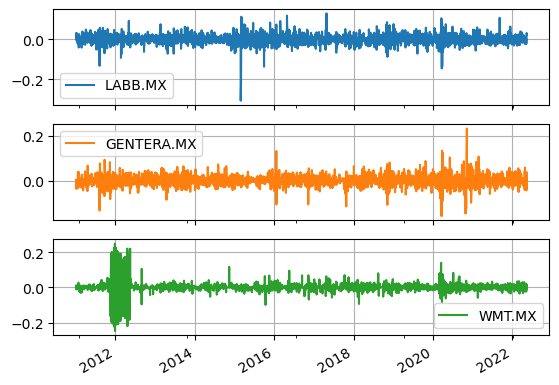

In [42]:
dataLogRets.plot(
    subplots=True,
    grid=True
)

## <font color='crimson'> Matriz de correlación </font>

### Global

Primero calculamos la matriz de correlación. Las instancias `DataFrame` de Pandas tienen un método útil: `DataFrame.corr()`.

In [43]:
corrGlob=dataLogRets.corr()
corrGlob

,LABB.MX,GENTERA.MX,WMT.MX
LABB.MX,1.000000,0.187453,-0.030994
GENTERA.MX,0.187453,1.000000,-0.011101
WMT.MX,-0.030994,-0.011101,1.000000


Clase auxiliar para graficar

In [19]:
class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

Graficamos con unos colores bien bergas.

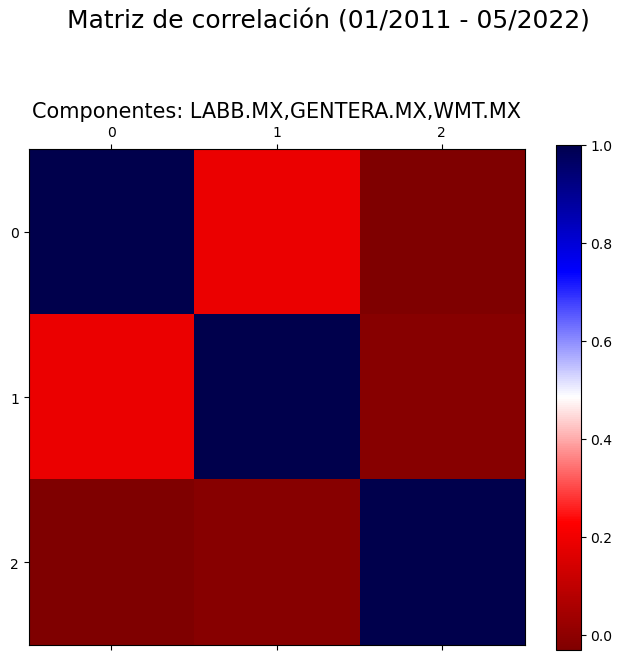

In [22]:
%matplotlib inline
coloresCorr='seismic_r' #plt.cm.BuPu_r,'cool', 'bwr_r'
normaCorr=MidpointNormalize(
    midpoint=0.,vmin=-1,vmax=1
)

fig, axes = plt.subplots(
    nrows=1, ncols=1, 
    figsize=(8,8)
)

cax=axes.matshow(
    corrGlob,
    cmap=coloresCorr
)
fig.colorbar(cax,shrink=0.82)

axes.set_title(
    'Componentes: {}'.format(
        ','.join(data.columns.values)
    ),
    fontsize=15
)

plt.suptitle(
    'Matriz de correlación ({:%m/%Y} - {:%m/%Y})'.format(
        dataLogRets.index[0],
        dataLogRets.index[-1]
    ),
    fontsize=18
)

plt.show()

Se puede guardar la tabla de los rendimientos logarítmicos en formato `CSV`:

In [23]:
dataLogRets.to_csv(f'{dataLocation}/rendimientos.csv')

### Local

In [45]:
dateFirst='2016'
dateLast='2017'

dataLogRets.loc[dateFirst:dateLast]

,LABB.MX,GENTERA.MX,WMT.MX
2016-01-04,0.039637,-0.047591,-0.005521
2016-01-05,-0.045430,0.011257,0.035452
2016-01-06,-0.008753,-0.008431,0.016725
2016-01-07,-0.029742,-0.041619,0.038218
2016-01-08,-0.015209,-0.002291,0.010683
...,...,...,...
2017-12-22,0.000987,0.013097,0.024988
2017-12-26,0.008841,-0.011215,0.011756
2017-12-27,0.014081,0.011215,-0.013439
2017-12-28,-0.006773,0.003711,0.007322


Calcular la correlación correspondiente:

In [46]:
corrLoc=dataLogRets.loc[dateFirst:dateLast].corr()

Grafiquita:

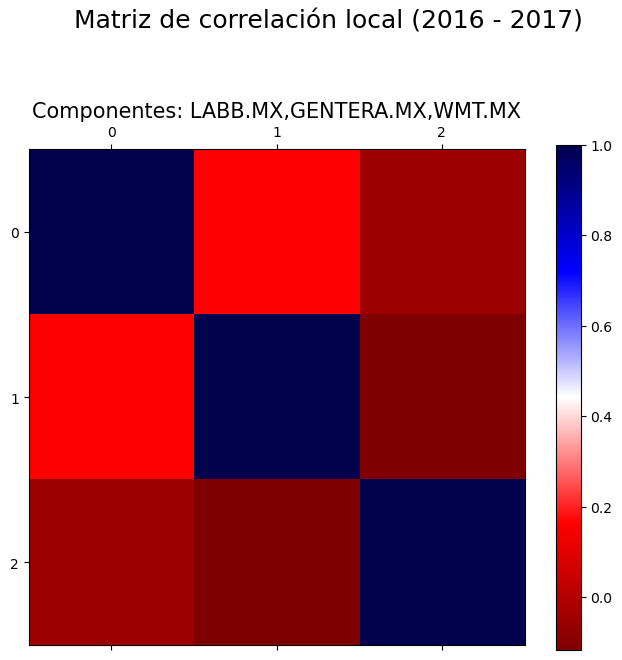

In [47]:
%matplotlib inline

fig, axes = plt.subplots(
    nrows=1, ncols=1, 
    figsize=(8,8)
)

cax=axes.matshow(
    corrLoc,
    cmap=coloresCorr
)
fig.colorbar(cax,shrink=0.82)

axes.set_title(
    'Componentes: {}'.format(
        ','.join(data.columns.values)
    ),
    fontsize=15
)

plt.suptitle(
    'Matriz de correlación local ({} - {})'.format(
        dateFirst,
        dateLast
    ),
    fontsize=18
)

plt.show()

**¿Qué tanto difieren las matrices local y global?**

In [48]:
(corrLoc-corrGlob).abs()

,LABB.MX,GENTERA.MX,WMT.MX
LABB.MX,0.000000,0.028731,0.017928
GENTERA.MX,0.028731,0.000000,0.105062
WMT.MX,0.017928,0.105062,0.000000
